# The reuters dataset

### Loading reuters dataset

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 12s 5us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
train_data[8981]

[1,
 227,
 2406,
 91,
 2,
 125,
 2855,
 21,
 4,
 3976,
 76,
 7,
 4,
 757,
 481,
 3976,
 790,
 5259,
 5654,
 9,
 111,
 149,
 8,
 7,
 10,
 76,
 223,
 51,
 4,
 417,
 8,
 1047,
 91,
 6917,
 1688,
 340,
 7,
 194,
 9411,
 6,
 1894,
 21,
 127,
 2151,
 2394,
 1456,
 6,
 3034,
 4,
 329,
 433,
 7,
 65,
 87,
 1127,
 10,
 8219,
 1475,
 290,
 9,
 21,
 567,
 16,
 1926,
 24,
 4,
 76,
 209,
 30,
 4033,
 6655,
 5654,
 8,
 4,
 60,
 8,
 4,
 966,
 308,
 40,
 2575,
 129,
 2,
 295,
 277,
 1071,
 9,
 24,
 286,
 2114,
 234,
 222,
 9,
 4,
 906,
 3994,
 8519,
 114,
 5758,
 1752,
 7,
 4,
 113,
 17,
 12]

### Decoding newswires back to text

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 2s 4us/step


In [ ]:
#Note that the indices are offset by 3 because 0, 1, and 2 are reserved
#indices for “padding,” “start of sequence,” and “unknown.”

In [9]:
decoded_newswire[0]

'?'

In [10]:
decoded_newswire[1]

' '

In [11]:
decoded_newswire[2]

'?'

In [12]:
decoded_newswire[3]

' '

In [13]:
decoded_newswire[4]

'?'

In [14]:
decoded_newswire[89]

'a'

In [15]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [16]:
train_labels[10]

3

In [17]:
train_labels[232]

3

In [18]:
train_labels[100]

20

# Preparing the data

### Encoding the data

In [ ]:
#There are 2 methods of encoding the data
# 1. you can cast the label list as an integer tensor
# 2. by one hot encoding

# method 1 of encoding
numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)          #vectorizing training data
x_test = vectorize_sequences(test_data)            #vectorizing test data

In [22]:
#method 2 of encoding 9one hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [25]:
# built in keras method for one hot encoding
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Building your network

### Model definition

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Compiling the model

In [28]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Validating your approach

### Setting aside a validation set

In [29]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training the model

In [30]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 703us/sample - loss: 2.6034 - accuracy: 0.5122 - val_loss: 1.7249 - val_accuracy: 0.6290
Epoch 2/20
7982/7982 [==============================] - 2s 235us/sample - loss: 1.4169 - accuracy: 0.7015 - val_loss: 1.3136 - val_accuracy: 0.6930
Epoch 3/20
7982/7982 [==============================] - 2s 207us/sample - loss: 1.0436 - accuracy: 0.7747 - val_loss: 1.1450 - val_accuracy: 0.7490
Epoch 4/20
7982/7982 [==============================] - 2s 194us/sample - loss: 0.8206 - accuracy: 0.8274 - val_loss: 1.0170 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 2s 212us/sample - loss: 0.6473 - accuracy: 0.8661 - val_loss: 0.9740 - val_accuracy: 0.7870
Epoch 6/20
7982/7982 [==============================] - 2s 209us/sample - loss: 0.5177 - accuracy: 0.8936 - val_loss: 0.9259 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 2s 210us

### Plotting the training and validation loss

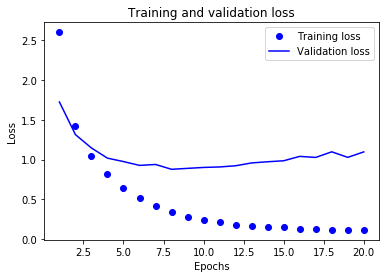

In [36]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

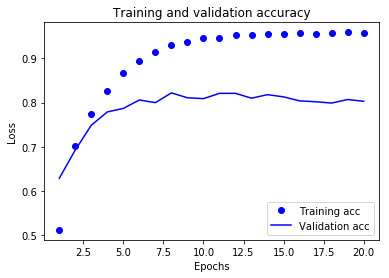

In [35]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
#The network begins to overfit after nine epochs. Let’s train a new network from
#scratch for nine epochs and then evaluate it on the test set.

### Retraining a model from scratch

In [38]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 284us/sample - loss: 2.6594 - accuracy: 0.4635 - val_loss: 1.8001 - val_accuracy: 0.6070
Epoch 2/9
7982/7982 [==============================] - 2s 225us/sample - loss: 1.4766 - accuracy: 0.6977 - val_loss: 1.3673 - val_accuracy: 0.7010
Epoch 3/9
7982/7982 [==============================] - 2s 221us/sample - loss: 1.0980 - accuracy: 0.7700 - val_loss: 1.1534 - val_accuracy: 0.7600
Epoch 4/9
7982/7982 [==============================] - 2s 213us/sample - loss: 0.8595 - accuracy: 0.8229 - val_loss: 1.0457 - val_accuracy: 0.7780
Epoch 5/9
7982/7982 [==============================] - 2s 215us/sample - loss: 0.6764 - accuracy: 0.8616 - val_loss: 0.9729 - val_accuracy: 0.7900
Epoch 6/9
7982/7982 [==============================] - 2s 207us/sample - loss: 0.5376 - accuracy: 0.8914 - val_loss: 0.9206 - val_accuracy: 0.8000
Epoch 7/9
7982/7982 [==============================] - 2s 204us/sample

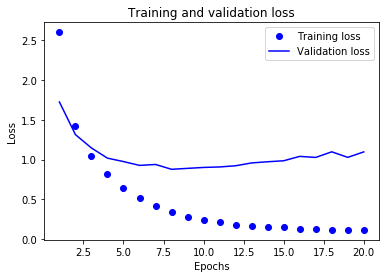

In [39]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

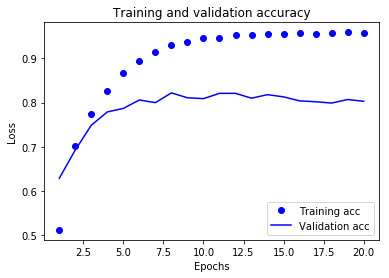

In [43]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
results

[0.9674310030304526, 0.7911843]

In [45]:
# This approach reaches an accuracy of ~80%

# Generating predictions on new data

### Generating predictions for new data

In [46]:
predictions = model.predict(x_test)

In [48]:
#Each entry in predictions is a vector of length 46:
predictions[0].shape

(46,)

In [49]:
#The coefficients in this vector sum to 1:
np.sum(predictions[0])

0.99999994

In [51]:
#The largest entry is the predicted class—the class with the highest probability:
np.argmax(predictions[1])

1

In [52]:
predictions[0]

array([2.1772944e-04, 1.9548826e-04, 2.3030138e-05, 9.1277105e-01,
       6.7308873e-02, 3.7213590e-06, 1.3479559e-05, 5.6822770e-05,
       4.9406863e-03, 5.5314595e-05, 9.8924371e-05, 3.7605332e-03,
       1.3185074e-05, 7.6643465e-04, 2.3712793e-05, 1.5783215e-04,
       2.8797984e-03, 1.1878886e-04, 2.9747290e-04, 7.9034094e-04,
       2.9638140e-03, 6.6014234e-04, 7.2642324e-06, 4.9112499e-05,
       2.2406127e-06, 2.1117525e-05, 1.1873704e-05, 3.5778660e-04,
       4.1057698e-05, 2.4328745e-04, 2.5017342e-05, 9.3237642e-05,
       1.1283090e-04, 2.4914603e-05, 1.0698331e-05, 7.6357755e-06,
       4.4624440e-04, 1.3141814e-05, 5.1869825e-05, 1.4880831e-04,
       8.6293658e-05, 1.0356651e-04, 8.4339654e-06, 6.8445806e-06,
       7.4829899e-08, 9.4389843e-06], dtype=float32)

In [53]:
predictions[4]

array([3.8025864e-06, 1.1820133e-03, 1.6611161e-04, 1.4002282e-04,
       4.1696523e-05, 2.6638936e-05, 5.6153693e-04, 2.8273894e-06,
       6.8389463e-06, 2.4422961e-05, 1.3329151e-04, 3.5782941e-05,
       2.0540742e-06, 9.4974601e-01, 1.2710004e-05, 2.6264848e-04,
       4.1299712e-02, 1.3692576e-03, 1.1431212e-05, 3.2220868e-04,
       9.2153896e-05, 2.5815551e-05, 2.3321661e-06, 4.9383333e-04,
       5.2847106e-05, 8.6253957e-04, 2.6559346e-06, 1.0970751e-05,
       8.5082446e-04, 4.8243091e-05, 1.7039418e-04, 2.1686620e-04,
       1.3474148e-04, 3.7886919e-05, 1.3338185e-05, 1.2587003e-05,
       1.7421435e-04, 2.1210287e-04, 3.3981199e-04, 1.8176132e-04,
       1.9033851e-05, 4.3043465e-04, 7.7859659e-06, 4.0069358e-06,
       2.2586330e-04, 2.5947998e-05], dtype=float32)